In [2]:
import pandas as pd
import numpy as np

In [3]:
path = './datasets/oakland-crime-statistics-2011-to-2016/'
data = pd.read_csv(path+'records-for-2015.csv', index_col=0)

In [4]:
data.head()

,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
Agency,,,,,,,,,
OP,2015-01-01T00:01:59.000,S ELMHURST AV,P3,31Y,2,415,DISTURBING THE PEACE,LOP150101000003,2015-01-01T06:23:08.000
OP,2015-01-01T00:02:02.000,AV&D ST,P3,32X,2,415GS,415 GUNSHOTS,LOP150101000007,2015-01-01T01:44:40.000
OP,2015-01-01T00:02:06.000,BANCROFT AV,P3,30Y,2,933R,ALARM-RINGER,LOP150101000004,2015-01-01T02:12:39.000
OP,2015-01-01T00:03:16.000,MACARTHUR BLVD,P3,30Y,2,415GS,415 GUNSHOTS,LOP150101000005,2015-01-01T01:53:08.000
OP,2015-01-01T00:03:45.000,ST&ADELINE ST,P1,02X,2,415GS,415 GUNSHOTS,LOP150101000009,2015-01-01T00:37:09.000


In [5]:
data.shape

(192581, 9)

In [6]:
data.dtypes

Create Time                  object
Location                     object
Area Id                      object
Beat                         object
Priority                      int64
Incident Type Id             object
Incident Type Description    object
Event Number                 object
Closed Time                  object
dtype: object

In [7]:
data['Create Time'].value_counts()

2015-04-18T13:52:06.000    3
2015-10-30T17:38:37.000    2
2015-04-13T16:19:45.000    2
2015-04-12T16:33:32.000    2
2015-07-16T21:48:30.000    2
                          ..
2015-08-03T00:21:20.000    1
2015-04-20T22:01:00.000    1
2015-05-09T00:53:59.000    1
2015-11-13T23:41:33.000    1
2015-09-17T07:41:47.000    1
Name: Create Time, Length: 191944, dtype: int64

In [8]:
data['Location'].value_counts()

 INTERNATIONAL BLVD           3695
 AV&INTERNATIONAL BLVD        3106
 MACARTHUR BLVD               3105
 BROADWAY                     2407
 FOOTHILL BLVD                1753
                              ... 
24TH HAVENSCOURT BLVD            1
E BAYO ST                        1
105TH 89TH AV                    1
CAMPBELL MOUNTAIN BLVD           1
21ST JEAN ST                     1
Name: Location, Length: 36515, dtype: int64

In [9]:
data['Area Id'].value_counts()

P3     81629
P1     73141
P2     33423
POU     3787
PCW      595
TEC        6
Name: Area Id, dtype: int64

In [10]:
data['Beat'].value_counts()

04X     8048
08X     6874
30Y     5690
19X     5564
30X     5542
23X     5492
26Y     5449
34X     5172
06X     5056
03X     4983
07X     4910
29X     4599
31Y     4556
25X     4409
35X     4287
20X     4284
27Y     4242
32X     3940
27X     3899
12Y     3868
09X     3831
33X     3790
21Y     3574
03Y     3512
32Y     3456
02Y     3290
14X     3290
22X     3207
10Y     2937
26X     2802
24X     2733
10X     2705
28X     2579
24Y     2558
13Z     2555
01X     2552
17Y     2551
31X     2535
12X     2516
02X     2515
21X     2511
05X     2464
22Y     2456
15X     2437
35Y     2293
11X     2186
31Z     2127
14Y     1920
17X     1776
13Y     1734
18Y     1604
16Y     1577
25Y     1406
18X     1263
16X     1223
13X     1117
05Y      775
PDT2      35
Name: Beat, dtype: int64

In [12]:
data['Priority'].value_counts()

2    150162
1     42418
0         1
Name: Priority, dtype: int64

### 五数概括

In [13]:
number_data = ['Priority']
data[number_data].describe()

,Priority
count,192581.000000
mean,1.779729
std,0.414443
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


### 直方图、盒图描述

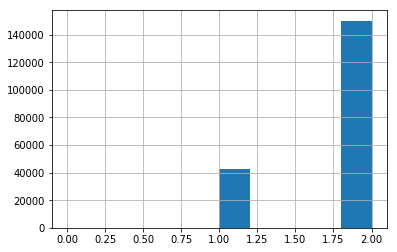

In [14]:
data['Priority'].hist()

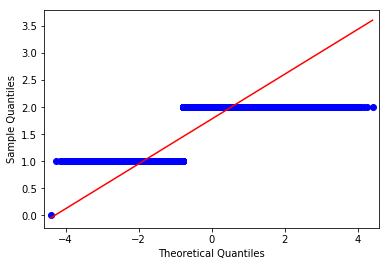

In [15]:
import statsmodels.api as sm
import pylab

sm.qqplot(data['Priority'], line='s')
pylab.show()

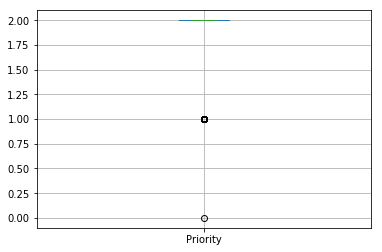

In [16]:
import matplotlib.pyplot as plt

data['Priority'].plot(kind='box', notch=True, grid=True)
plt.show()

## 缺失数据处理

#### 首先统计缺失数据数量

In [17]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [18]:
missing_data(data)

,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
Total,0,0,0,1325,0,0,243,0,0
Percent,0,0,0,0.688022,0,0,0.126181,0,0
Types,object,object,object,object,int64,object,object,object,object


#### 直接删除缺失值数据

In [19]:
data_del = data.dropna()

In [20]:
data.shape,data_del.shape

((192581, 9), (191013, 9))

In [21]:
data_del.head()

,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
Agency,,,,,,,,,
OP,2015-01-01T00:01:59.000,S ELMHURST AV,P3,31Y,2,415,DISTURBING THE PEACE,LOP150101000003,2015-01-01T06:23:08.000
OP,2015-01-01T00:02:02.000,AV&D ST,P3,32X,2,415GS,415 GUNSHOTS,LOP150101000007,2015-01-01T01:44:40.000
OP,2015-01-01T00:02:06.000,BANCROFT AV,P3,30Y,2,933R,ALARM-RINGER,LOP150101000004,2015-01-01T02:12:39.000
OP,2015-01-01T00:03:16.000,MACARTHUR BLVD,P3,30Y,2,415GS,415 GUNSHOTS,LOP150101000005,2015-01-01T01:53:08.000
OP,2015-01-01T00:03:45.000,ST&ADELINE ST,P1,02X,2,415GS,415 GUNSHOTS,LOP150101000009,2015-01-01T00:37:09.000


#### 利用众数填充

In [22]:
from collections import Counter
from math import isnan

miss_features = ['Create Time','Location','Area Id','Beat','Priority','Incident Type Id','Incident Type Description','Event Number','Closed Time']

data_fill = data

for col in miss_features:
    word_counts = Counter(data_fill[col])
    top = word_counts.most_common(1)[0][0]
    if type(top) != str:
        if isnan(top):
            top = word_counts.most_common(2)[1][0]
    print(top, type(top))
    temp = data_fill[col].fillna(top)
    data_fill[col] = temp
data_fill.head()

2015-04-18T13:52:06.000 <class 'str'>
 INTERNATIONAL BLVD     <class 'str'>
P3 <class 'str'>
04X <class 'str'>
2 <class 'int'>
933R <class 'str'>
ALARM-RINGER <class 'str'>
LOP150101000003 <class 'str'>
2015-01-02T23:37:16.000 <class 'str'>


,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
Agency,,,,,,,,,
OP,2015-01-01T00:01:59.000,S ELMHURST AV,P3,31Y,2,415,DISTURBING THE PEACE,LOP150101000003,2015-01-01T06:23:08.000
OP,2015-01-01T00:02:02.000,AV&D ST,P3,32X,2,415GS,415 GUNSHOTS,LOP150101000007,2015-01-01T01:44:40.000
OP,2015-01-01T00:02:06.000,BANCROFT AV,P3,30Y,2,933R,ALARM-RINGER,LOP150101000004,2015-01-01T02:12:39.000
OP,2015-01-01T00:03:16.000,MACARTHUR BLVD,P3,30Y,2,415GS,415 GUNSHOTS,LOP150101000005,2015-01-01T01:53:08.000
OP,2015-01-01T00:03:45.000,ST&ADELINE ST,P1,02X,2,415GS,415 GUNSHOTS,LOP150101000009,2015-01-01T00:37:09.000


### 填充之后没有缺失数据了

In [23]:
missing_data(data_fill)

,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
Total,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0
Types,object,object,object,object,int64,object,object,object,object


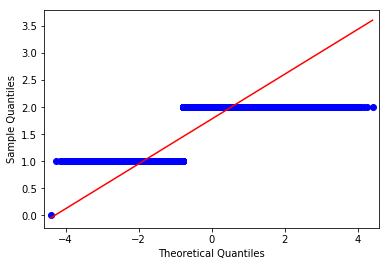

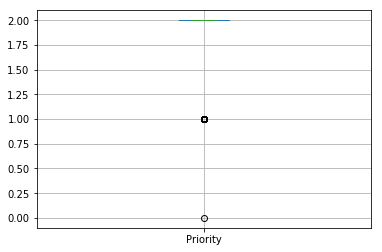

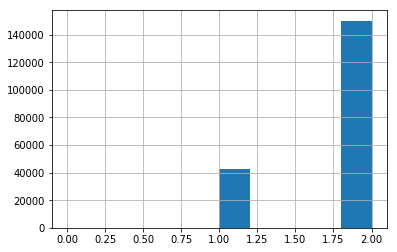

In [29]:
sm.qqplot(data_fill['Priority'], line='s')
pylab.show()
data_fill['Priority'].plot(kind='box', notch=True, grid=True)
plt.show()
data_fill['Priority'].hist()

### 使用属性相关关系填充

In [24]:
data.corr()

,Priority
Priority,1.0


In [25]:
data.corr('spearman')

,Priority
Priority,1.0


In [26]:
data.corr('kendall')

,Priority
Priority,1.0
